In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
data = pd.read_excel("train.xlsx")
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [5]:
data.shape

(36752, 19)

In [7]:
data.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [8]:
data.isnull().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

In [15]:
X = data.drop('target', axis=1)
X.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80


In [16]:
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)
sse

C:\Users\mdreh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mdreh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mdreh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

[57898008.75663908,
 41367829.1353148,
 34995318.69053089,
 30945308.419966888,
 29021099.614199,
 27237194.94429096,
 25922444.477264084,
 24764477.759299822,
 24015213.450933725,
 23259308.44202562]

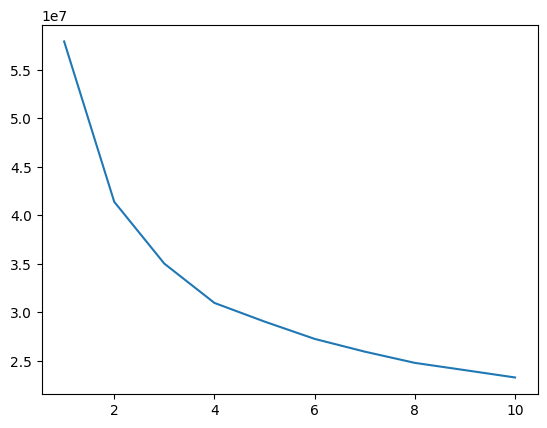

In [18]:
plt.plot(range(1,11), sse)
plt.show()

In [19]:
model = KMeans(n_clusters=3, random_state=2)
model.fit(X)
model

C:\Users\mdreh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=2)

In [20]:
testData = pd.read_excel("test.xlsx")
testData.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [22]:
model.predict(testData)

array([1, 2, 1, ..., 1, 0, 1])

In [23]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))